Initializing project environment...
Каталог очищено.

Початок завантаження архіву...
Файл завантажено успішно.
Архів розпаковано та перейменовано.


C:\Users\Виктор\AppData\Local\Temp\ipykernel_49776\2660730184.py:56: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=sep)


Файл прочитано та збережено як CSV.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


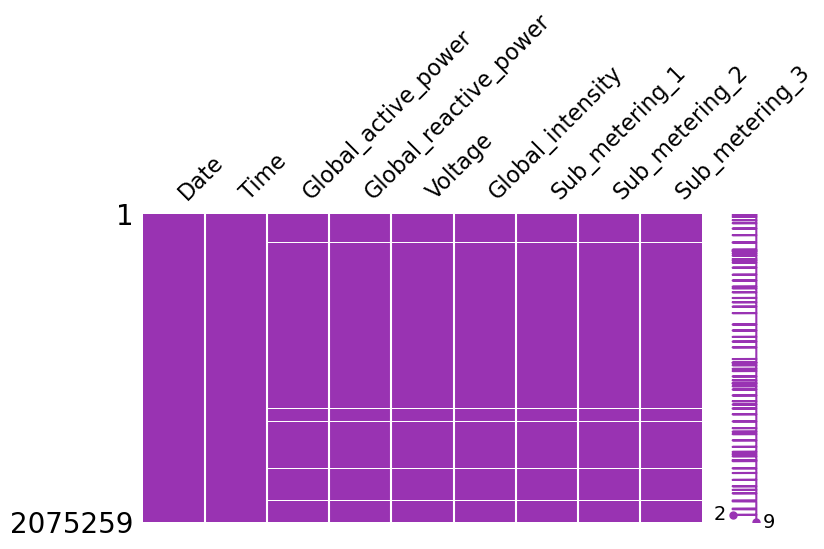

<Figure size 800x400 with 0 Axes>

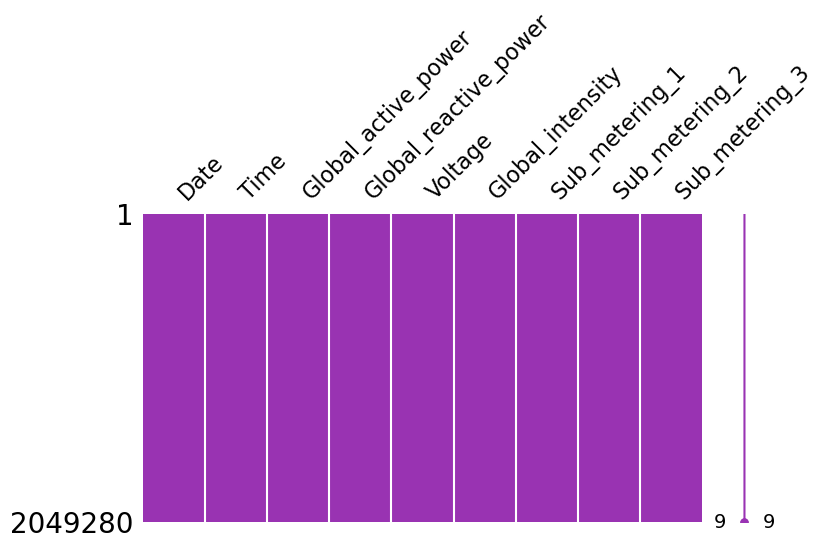

DataFrame (перші 15 рядків):
Date        Time        Global_active_power    Global_reactive_power    Voltage    Global_intensity    Sub_metering_1    Sub_metering_2    Sub_metering_3
----------  --------  ---------------------  -----------------------  ---------  ------------------  ----------------  ----------------  ----------------
2006-12-16  17:24:00                  4.216                    0.418     234.84                18.4                 0                 1                17
2006-12-16  17:25:00                  5.36                     0.436     233.63                23                   0                 1                16
2006-12-16  17:26:00                  5.374                    0.498     233.29                23                   0                 2                17
2006-12-16  17:27:00                  5.388                    0.502     233.74                23                   0                 1                17
2006-12-16  17:28:00                  3.666    

In [8]:
import urllib.request as req
import pandas as pd
import numpy as np
import zipfile
import missingno as msno
import os
import time
from tabulate import tabulate
import matplotlib.pyplot as plt 

print("Initializing project environment...")
WORKDIR = "D:/зпад/foranakonda_files/forlab4"
def setup_workspace(path: str):
    os.makedirs(path, exist_ok=True)
    if input("Очистити вміст директорії? (y/n): ").strip().lower() == "y":
        for obj in os.listdir(path):
            full_path = os.path.join(path, obj)
            if os.path.isfile(full_path):
                os.remove(full_path)
        print("Каталог очищено.\n")
    else:
        print("Очищення пропущено.\n")
def fetch_dataset(destination: str):
    archive_link = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
    archive_name = "household_data.zip"
    local_archive = os.path.join(destination, archive_name)

    for attempt in range(3):
        try:
            print("Початок завантаження архіву...")
            with req.urlopen(archive_link) as response:
                content = response.read()
            with open(local_archive, "wb") as file:
                file.write(content)
            print("Файл завантажено успішно.")
            return local_archive
        except Exception as error:
            print(f"Спроба {attempt + 1} не вдалася: {error}")
            if attempt < 2:
                time.sleep(5)
            else:
                print("Не вдалося завантажити файл.")
                return None
def extract_data(archive_path: str, output_dir: str):
    with zipfile.ZipFile(archive_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
        for member in zip_ref.namelist():
            if member.endswith('.txt'):
                new_file = os.path.join(output_dir, "dataset.csv")
                os.rename(os.path.join(output_dir, member), new_file)
                break
    os.remove(archive_path)
    print("Архів розпаковано та перейменовано.")
def preprocess_csv(file_path: str, sep: str = ';'):
    try:
        df = pd.read_csv(file_path, sep=sep)
        df.to_csv(file_path, index=False)
        print("Файл прочитано та збережено як CSV.")
        df.info()
    except Exception as e:
        print(f"Помилка при обробці CSV: {e}")
def load_numpy_data(csv_path, sep=';', export=False, out_path=None):
    try:
        arr = np.genfromtxt(csv_path, delimiter=sep, dtype=None, encoding=None)
        if export and out_path:
            np.savetxt(out_path, arr, delimiter=',', fmt='%s')
            print(f"NumPy масив збережено в: {out_path}")
        return arr
    except Exception as err:
        print(f"Помилка NumPy зчитування: {err}")
        return None
def transform_data(path_to_csv):
    dtype_map = {
        'Global_active_power': float,
        'Global_reactive_power': float,
        'Voltage': float,
        'Global_intensity': float,
        'Sub_metering_1': float,
        'Sub_metering_2': float,
        'Sub_metering_3': float
    }
    df = pd.read_csv(path_to_csv, dtype=dtype_map, na_values='?')
    msno.matrix(df, color=(0.6, 0.2, 0.7), figsize=(8, 4))
    plt.show()
    df.dropna(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True).dt.strftime('%Y-%m-%d')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
    return df, df.to_numpy()

def display_preview(data):
    if isinstance(data, pd.DataFrame):
        print("DataFrame (перші 15 рядків):")
        print(tabulate(data.head(15).values.tolist(), headers=data.columns.tolist(), tablefmt="simple"))
    elif isinstance(data, np.ndarray):
        print("NumPy масив (перші 15 рядків):")
        print(tabulate(data[:15].tolist(), tablefmt="simple"))
    else:
        print("Тип даних не підтримується.")
setup_workspace(WORKDIR)
archive_file = fetch_dataset(WORKDIR)
if archive_file:
    extract_data(archive_file, WORKDIR)
    dataset_path = os.path.join(WORKDIR, "dataset.csv")
    preprocess_csv(dataset_path)
    load_numpy_data(dataset_path)
    cleaned_df, cleaned_np = transform_data(dataset_path)
    plt.figure(figsize=(8, 4))
    msno.matrix(cleaned_df, color=(0.6, 0.2, 0.7), figsize=(8, 4))
    plt.show()
    display_preview(cleaned_df)
    display_preview(cleaned_np)

2. Обрати всі записи, у яких вольтаж перевищую 235 В.

In [2]:
def select_high_power(df: pd.DataFrame, threshold: float = 5.0):
    high_power_df = df[df['Global_active_power'] > threshold]
    print(f"Кількість записів із споживанням понад {threshold} кВт: {len(high_power_df)}")
    return high_power_df

high_power_records = select_high_power(cleaned_df)
display_preview(high_power_records)

Кількість записів із споживанням понад 5.0 кВт: 17547
DataFrame (перші 15 рядків):
Date        Time        Global_active_power    Global_reactive_power    Voltage    Global_intensity    Sub_metering_1    Sub_metering_2    Sub_metering_3
----------  --------  ---------------------  -----------------------  ---------  ------------------  ----------------  ----------------  ----------------
2006-12-16  17:25:00                  5.36                     0.436     233.63                23                   0                 1                16
2006-12-16  17:26:00                  5.374                    0.498     233.29                23                   0                 2                17
2006-12-16  17:27:00                  5.388                    0.502     233.74                23                   0                 1                17
2006-12-16  17:35:00                  5.412                    0.47      232.78                23.2                 0                 1            

2. Обрати всі записи, у яких вольтаж перевищую 235 В.


In [3]:
def select_high_voltage(df: pd.DataFrame, threshold: float = 235.0):
    high_voltage_df = df[df['Voltage'] > threshold]
    print(f"Кількість записів з вольтажем понад {threshold} В: {len(high_voltage_df)}")
    return high_voltage_df

high_voltage_records = select_high_voltage(cleaned_df)
display_preview(high_voltage_records)

Кількість записів з вольтажем понад 235.0 В: 1952491
DataFrame (перші 15 рядків):
Date        Time        Global_active_power    Global_reactive_power    Voltage    Global_intensity    Sub_metering_1    Sub_metering_2    Sub_metering_3
----------  --------  ---------------------  -----------------------  ---------  ------------------  ----------------  ----------------  ----------------
2006-12-16  17:28:00                  3.666                    0.528     235.68                15.8                 0                 1                17
2006-12-16  17:29:00                  3.52                     0.522     235.02                15                   0                 2                17
2006-12-16  17:30:00                  3.702                    0.52      235.09                15.8                 0                 1                17
2006-12-16  17:31:00                  3.7                      0.52      235.22                15.8                 0                 1             

3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [7]:
def select_by_current_and_compare_groups(df: pd.DataFrame, lower: float = 19.0, upper: float = 20.0):
    current_range_df = df[(df['Global_intensity'] >= lower) & (df['Global_intensity'] <= upper)]
    condition = current_range_df['Sub_metering_2'] > (current_range_df['Sub_metering_1'] + current_range_df['Sub_metering_3'])
    result_df = current_range_df[condition]
    print(f"Кількість записів, які відповідають умові: {len(result_df)}")
    return result_df
intensity_filtered_records = select_by_current_and_compare_groups(cleaned_df)
display_preview(intensity_filtered_records)

Кількість записів, які відповідають умові: 2153
DataFrame (перші 15 рядків):
Date        Time        Global_active_power    Global_reactive_power    Voltage    Global_intensity    Sub_metering_1    Sub_metering_2    Sub_metering_3
----------  --------  ---------------------  -----------------------  ---------  ------------------  ----------------  ----------------  ----------------
2006-12-16  18:09:00                  4.464                    0.136     234.66                19                   0                37                16
2006-12-17  01:04:00                  4.582                    0.258     238.08                19.6                 0                13                 0
2006-12-17  01:08:00                  4.618                    0.104     239.61                19.6                 0                27                 0
2006-12-17  01:19:00                  4.636                    0.14      237.37                19.4                 0                36                 0

4. Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [5]:
def random_sample_and_mean_consumption(df: pd.DataFrame, sample_size: int = 500_000, seed: int = 42):
    if sample_size > len(df):
        print(f"Увага: розмір вибірки ({sample_size}) перевищує розмір даних ({len(df)}). Зменшую.")
        sample_size = len(df)
    sampled_df = df.sample(n=sample_size, random_state=seed, replace=False)
    means = sampled_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    print("Середні значення по 3-х групах споживання у вибірці:")
    print(tabulate(means.reset_index().values, headers=["Група", "Середнє споживання (Вт·хв)"], tablefmt="grid"))
    return sampled_df, means
sample_500k_df, group_means = random_sample_and_mean_consumption(cleaned_df)


Середні значення по 3-х групах споживання у вибірці:
+----------------+------------------------------+
| Група          |   Середнє споживання (Вт·хв) |
+================+==============================+
| Sub_metering_1 |                      1.11926 |
+----------------+------------------------------+
| Sub_metering_2 |                      1.30891 |
+----------------+------------------------------+
| Sub_metering_3 |                      6.45295 |
+----------------+------------------------------+


5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [6]:
def filter_evening_high_consumers(df: pd.DataFrame):
    after_18 = df[df['Time'] >= pd.to_datetime('18:00:00').time()]
    high_power = after_18[after_18['Global_active_power'] > 6]
    return high_power

def filter_by_max_group2(df: pd.DataFrame):
    return df[
        (df['Sub_metering_2'] > df['Sub_metering_1']) &
        (df['Sub_metering_2'] > df['Sub_metering_3'])
    ]

def split_and_sample(df: pd.DataFrame):
    mid = len(df) // 2
    first_half = df.iloc[:mid]
    second_half = df.iloc[mid:]
    
    every_3rd = first_half.iloc[::3]
    every_4th = second_half.iloc[::4]
    
    result = pd.concat([every_3rd, every_4th], ignore_index=True)
    return result
step1 = filter_evening_high_consumers(cleaned_df)
step2 = filter_by_max_group2(step1)
step3 = split_and_sample(step2)
print(f"Початкових записів після 18:00 з >6кВт: {len(step1)}")
print(f"Записів з домінуючим споживанням Sub_metering_2: {len(step2)}")
print(f"Після відбору (3-й з першої, 4-й з другої): {len(step3)}")
display_preview(step3)


Початкових записів після 18:00 з >6кВт: 2882
Записів з домінуючим споживанням Sub_metering_2: 1061
Після відбору (3-й з першої, 4-й з другої): 310
DataFrame (перші 15 рядків):
Date        Time        Global_active_power    Global_reactive_power    Voltage    Global_intensity    Sub_metering_1    Sub_metering_2    Sub_metering_3
----------  --------  ---------------------  -----------------------  ---------  ------------------  ----------------  ----------------  ----------------
2006-12-16  18:05:00                  6.052                    0.192     232.93                26.2                 0                37                17
2006-12-16  18:08:00                  6.308                    0.116     232.25                27                   0                36                17
2006-12-28  20:58:00                  6.386                    0.374     236.63                27                   1                36                17
2006-12-28  21:02:00                  8.088           